# Graustufen, Histogramm & einfache Segmentierung

In diesem Notebook wandeln wir ein Bild in **Graustufen** um, betrachten das **Histogramm** und probieren eine ganz einfache **Segmentierung** mit einem Schwellwert (Threshold) aus.

**Idee:**
Alles, was heller als ein bestimmter Grenzwert ist, wird weiß – der Rest schwarz.

## 1. Imports


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, filters, io

## 2. Bild aus Bibliothek (skimage) laden

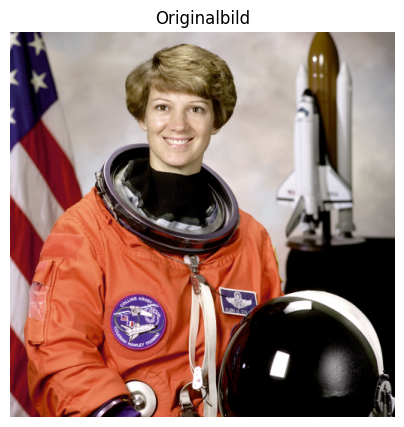

In [16]:
image_rgb = data.astronaut()
plt.figure(figsize=(5, 5))
plt.imshow(image_rgb)
plt.title('Originalbild')
plt.axis('off')
plt.show()

## 3. Konvertierung in Graustufen

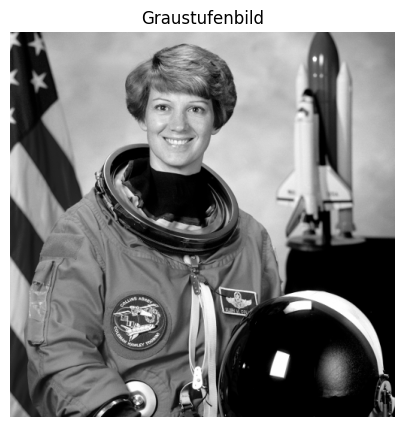

In [17]:
image_gray = color.rgb2gray(image_rgb)  # Konvertieren in Werte zwischen 0 und 1

plt.figure(figsize=(5, 5))
plt.imshow(image_gray, cmap='gray')
plt.title('Graustufenbild')
plt.axis('off')
plt.show()

## 4. Histogramm der Grauwerte

Das Histogramm zeigt, wie viele Pixel welchen Grauwert besitzen.

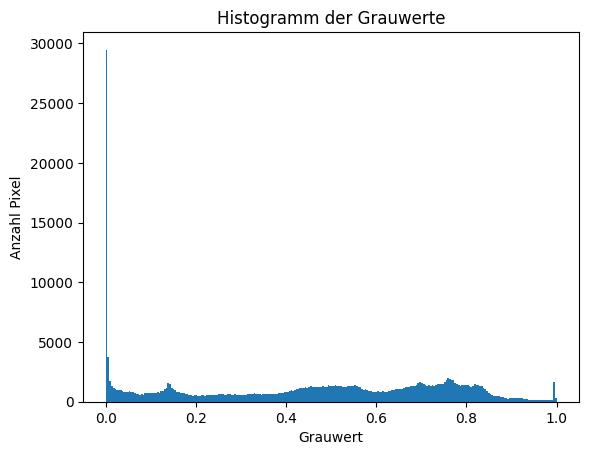

In [18]:
plt.figure()
plt.hist(image_gray.ravel(), bins=256, range=(0.0, 1.0))
plt.title('Histogramm der Grauwerte')
plt.xlabel('Grauwert')
plt.ylabel('Anzahl Pixel')
plt.show()

## 5. "Segmentierung" mit Festem Schwellenwert

Wir wählen z.B. einen Schwellenwert von **0.5**:

- Pixel > 0.5 → weiß (True)
- Pixel ≤ 0.5 → schwarz (False)

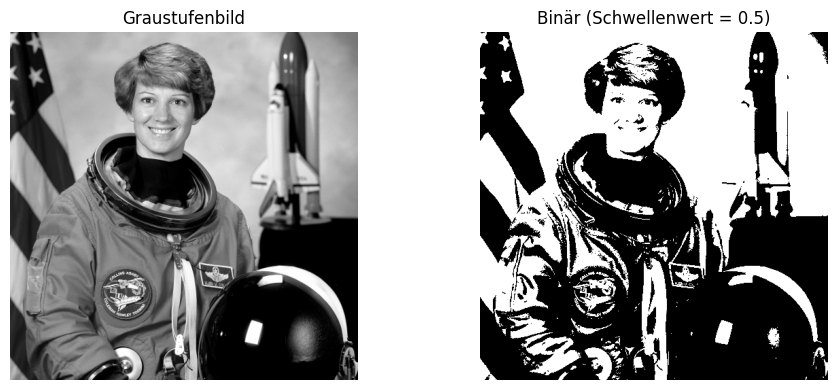

In [19]:
threshold_value = 0.5
binary_fixed = image_gray > threshold_value

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Graustufenbild')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_fixed, cmap='gray')
plt.title(f'Binär (Schwellenwert = {threshold_value})')
plt.axis('off')

plt.tight_layout()
plt.show()

## 6. Automatischer Schwellwert (Otsu)

Der Otsu-Algorithmus versucht, einen "guten" Schwellwert automatisch zu finden.

Otsu-Threshold: 0.388671875


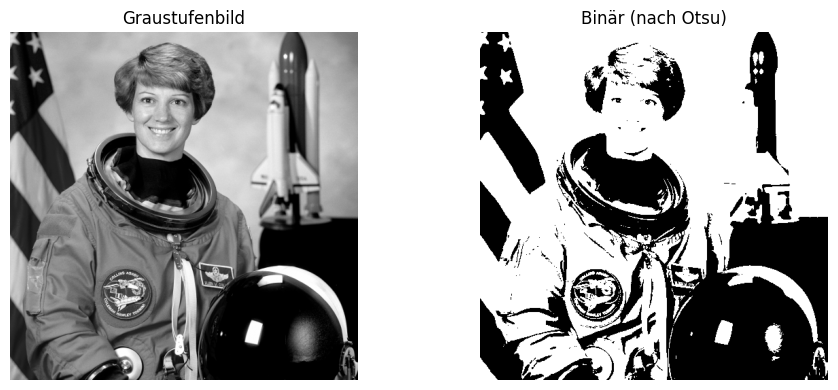

In [11]:
otsu_threshold = filters.threshold_otsu(image_gray)
binary_otsu = image_gray > otsu_threshold
print('Otsu-Threshold:', otsu_threshold)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Graustufenbild')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_otsu, cmap='gray')
plt.title('Binär (nach Otsu)')
plt.axis('off')

plt.tight_layout()
plt.show()

## 7. Segmentierung eigener Bilder (via URL)

In [20]:
def segment_image_from_url(url, threshold_value=None, use_otsu=False):
    """
    Lädt ein Bild von einer URL, wandelt es in Graustufen um,
    segmentiert es per Threshold und zeigt Original & Ergebnis nebeneinander.

    Parameter:
    - url: String, Web-Adresse des Bildes
    - threshold_value: fester Schwellwert (0..1), wenn None und use_otsu=False,
      wird z.B. 0.5 verwendet
    - use_otsu: Wenn True, wird der Otsu-Threshold automatisch bestimmt
    """
    # Bild von URL laden (RGB oder Graustufen)
    image = io.imread(url)

    # Falls das Bild schon Graustufen ist (2D), direkt verwenden
    if image.ndim == 2:
        image_gray = image.astype(float)
        # Normierung auf 0..1, falls nötig
        if image_gray.max() > 1.0:
            image_gray = image_gray / 255.0
    else:
        # RGB -> Graustufen
        image_gray = color.rgb2gray(image)  # liefert Werte 0..1

    # Threshold bestimmen
    if use_otsu:
        otsu_thr = filters.threshold_otsu(image_gray)
        thr = otsu_thr
        print("Otsu-Threshold:", otsu_thr)
    else:
        if threshold_value is None:
            threshold_value = 0.5  # Standardwert, falls nichts angegeben
        thr = threshold_value
        print("Fester Threshold:", thr)

    # Binärbild erzeugen
    binary = image_gray > thr

    # Plot: Original (Farb- oder Graubild) + Segmentierung
    plt.figure(figsize=(10, 4))

    # Originalbild anzeigen
    plt.subplot(1, 2, 1)
    # Wenn RGB-Bild: direkt anzeigen, sonst Graustufen
    if image.ndim == 3:
        plt.imshow(image)
    else:
        plt.imshow(image, cmap="gray")
    plt.title("Originalbild")
    plt.axis("off")

    # Segmentiertes Bild anzeigen
    plt.subplot(1, 2, 2)
    plt.imshow(binary, cmap="gray")
    if use_otsu:
        plt.title("Segmentierung (Otsu)")
    else:
        plt.title(f"Segmentierung (Threshold = {thr:.2f})")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


### Eigene URL angeben:
Ersetzt den unter "IMAGE_URL" hinterlegten Link mit einem Bild eurer Wahl. Was passiert, wenn ihr den Schwellenwert anpasst oder "use_otsu = False" durch "use_otsu = True" ersetzt?

Fester Threshold: 0.5


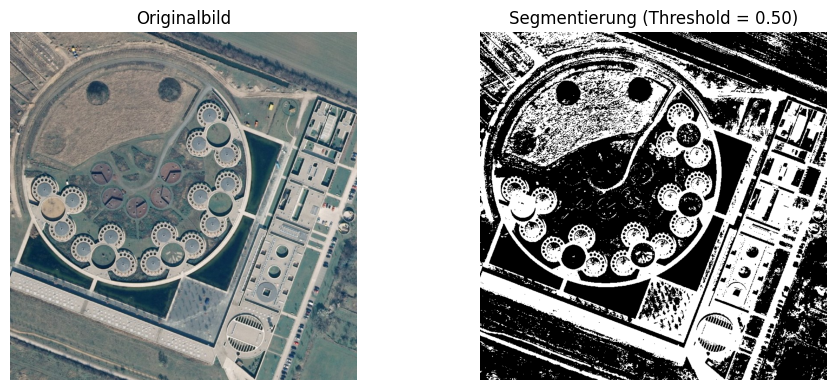

In [21]:
IMAGE_URL = "https://www.berlin.de/sen/sbw/_assets/stadtdaten/geoportal/landesvermessung/tierheim_800.jpg"
segment_image_from_url(IMAGE_URL, threshold_value=0.5, use_otsu=False)